#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Adding Dataset Path

In [2]:
DATASET_PATH = [
    './a1_data/a1_d1.csv',
    './a1_data/a1_d2.csv'
]

In [3]:
index = int(input("Choose Dataset number --  "))

Choose Dataset number --  0


In [4]:
df = pd.read_csv(DATASET_PATH[index])
df.head()

,x1,x2,y
0,-0.598283,1.023534,1
1,1.115929,0.512127,1
2,1.169815,-1.072747,0
3,0.631926,-0.255663,0
4,0.052532,1.198445,1


#### Training set and Testing set split

In [5]:
shuffle_df = df.sample(frac=1)
train_size = int(0.8 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]
print(test_set.head())
print(train_set.head())
print(len(df))

           x1        x2  y
581 -0.180133 -1.539165  0
718  1.066927 -1.465230  0
103  0.821145 -0.959446  0
529 -0.879852 -1.185888  0
7   -0.233013  1.099207  1
           x1        x2  y
146  1.097654  0.746275  1
894  0.499346 -0.953047  0
579  1.128638 -1.295676  0
703  1.640016  0.325307  1
904 -1.085891  0.831732  1
1000


### Data preparation

In [6]:
f0 = train_set[train_set['y'] == 0].iloc[:, :-1]
f1 = train_set[train_set['y'] > 0].iloc[:, :-1]

print(f0.head());
print(f1.head());

           x1        x2
894  0.499346 -0.953047
579  1.128638 -1.295676
684 -0.335995 -0.905815
847  1.144707 -0.643601
182 -0.686791 -1.472627
           x1        x2
146  1.097654  0.746275
703  1.640016  0.325307
904 -1.085891  0.831732
258  0.227797  1.424134
800 -0.212960  1.919713


In [7]:
mean_pos = f1.sum(axis=0) / len(f1)
mean_neg = f0.sum(axis=0) / len(f0)
std_pos = np.std(f1, axis=0)
std_neg = np.std(f0, axis=0)
print(f"Positive Class Mean - {mean_pos}   Negative Class Mean - {mean_neg}")
print(f"Positive class std - {std_pos}  Negative class std - {std_neg}")

Positive Class Mean - x1    0.016466
x2    0.983595
dtype: float64   Negative Class Mean - x1   -0.012468
x2   -0.994209
dtype: float64
Positive class std - x1    0.983876
x2    0.460375
dtype: float64  Negative class std - x1    0.933335
x2    0.330138
dtype: float64


In [8]:
#Covariance for negative class
temp = np.subtract(f0, mean_neg)
s_neg = np.dot(temp.T, temp)
print(s_neg)

#Covariance for positive class
temp = np.subtract(f1, mean_pos)
s_pos = np.dot(temp.T, temp)
print(s_pos)

#Total within class Variance
total_variance = np.add(s_pos, s_neg)
print(total_variance)

[[344.96155306  -2.64438672]
 [ -2.64438672  43.16054428]]
[[391.07703677 -29.03851771]
 [-29.03851771  85.62589155]]
[[736.03858984 -31.68290443]
 [-31.68290443 128.78643583]]


In [9]:
sw = total_variance
sw_inv = np.linalg.pinv(sw)
print(sw)
print(sw_inv)

[[736.03858984 -31.68290443]
 [-31.68290443 128.78643583]]
[[0.00137317 0.00033781]
 [0.00033781 0.0078479 ]]


In [10]:
s = mean_pos - mean_neg
print(s)

x1    0.028934
x2    1.977804
dtype: float64


In [11]:
print(temp.shape)
temp = np.expand_dims(s,1)
print(temp.shape)

(404, 2)
(2, 1)


In [12]:
w = np.dot(sw_inv, temp)
print(w.shape)
print(w)

(2, 1)
[[0.00070786]
 [0.01553138]]


In [14]:
y = np.dot(test_set.iloc[:, :-1],w)
y_train = np.dot(train_set.iloc[:, :-1], w)
print(y.shape)

(200, 1)


In [13]:
thres = 0
print(mean_neg.shape)
for m in [mean_neg, mean_pos]:
    thres += np.dot(np.squeeze(w), m)
thres *= 2
print(f"Optimal threshold -- ({thres})")

(2,)
Optimal threshold -- (-0.0003240364471439744)


In [16]:
neg_points = y[y < thres]
pos_points = y[y >= thres]
print(neg_points.shape)
print(pos_points.shape)

(95,)
(105,)


In [17]:
predictions = [0 if pred < thres else 1 for pred in y]
print("Accuracy:",(np.sum(predictions == test_set['y']) / len(test_set)) * 100)

Accuracy: 99.5


### Training set data plot

In [18]:
from scipy.stats import norm

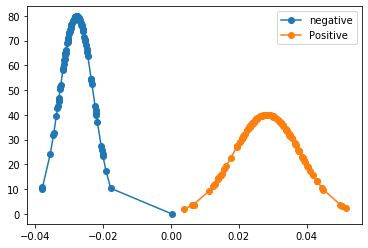

In [19]:
x = np.linspace(-5, 5, 5000)
h = sorted(neg_points)
mean = np.mean(h)
std = np.std(h)
fit = norm.pdf(h, mean, std)
plt.plot(h, fit, '-o', label='negative')
h = sorted(pos_points)
mean = np.mean(h)
std = np.std(h)
fit = norm.pdf(h, mean, std)
plt.plot(h, fit, '-o', label='Positive')
plt.legend()
plt.show()

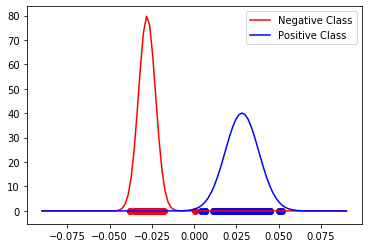

In [25]:
x = np.linspace(-0.09, 0.09, 100)

h = sorted(neg_points)
mu_h = np.mean(neg_points)
sigma_h = np.std(neg_points)

y_pdf = norm.pdf(x, mu_h, sigma_h)

h = sorted(pos_points)
mu_h = np.mean(pos_points)
sigma_h = np.std(pos_points)

y_cdf = norm.pdf(x, mu_h, sigma_h)

plt.plot(x, y_pdf, label='Negative Class', c='red')
plt.plot(x, y_cdf, label='Positive Class', c='blue')
# plt.figure(figsize=(10,2))
plt.scatter(neg_points,[0] * len(neg_points), c='red')
plt.scatter(pos_points, [0] * len(pos_points), c='blue')
plt.legend();

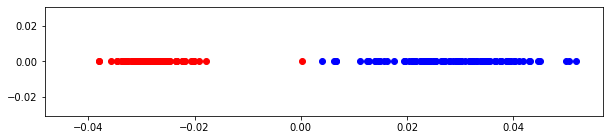

In [21]:
plt.figure(figsize=(10,2))
plt.scatter(neg_points,[0] * len(neg_points), c='red')
plt.scatter(pos_points, [0] * len(pos_points), c='blue')
plt.show()

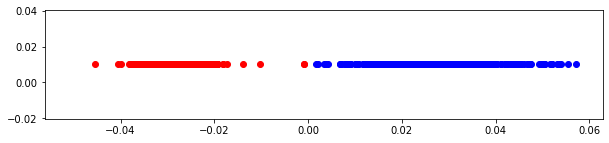

In [22]:
y_train_pos = y_train[y_train > thres]
y_train_neg = y_train[y_train < thres]

plt.figure(figsize=(10,2))
plt.scatter(y_train_neg,[0.01] * len(y_train_neg), c='red')
plt.scatter(y_train_pos, [0.01] * len(y_train_pos), c='blue')
plt.show()

In [23]:
tp, fp, tn, fn = 0, 0, 0, 0
label = test_set['y'].values
# print(y)
for i in range(len(label)):
    if y[i] >= thres:
        pred = 1
    else:
        pred = 0
    if label[i] == pred:
        if label[i] == 0:
            tn += 1
        else:
            tp += 1
    else:
        if label[i] == 0:
            fn += 1
        else:
            fp += 1
print(tp, fp, tn, fn)

105 1 94 0


In [125]:
print(len(label))

200


In [133]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = (2 * precision * recall) / (precision + recall)
print('precision ', precision)
print('recall', recall)
print('f-score ', f_score)

precision  0.9894736842105263
recall 1.0
f-score  0.9947089947089947
